In [1]:
import argparse
import torch
import torchvision
import torchvision.transforms as transforms
import json
import requests
import numpy as np
import matplotlib.pyplot as plt

In [3]:
test_dataset = torchvision.datasets.MNIST(root='./mnist/',
                                          train=False,download=True,
                                          transform=transforms.ToTensor())
batch_size = 100
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

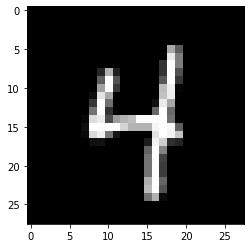

In [9]:
# Show a sample test image 
images, labels = next(iter(test_loader))
inference_image_index = 19
plt.imshow(images[inference_image_index].reshape(28,28), cmap="gray")

In [10]:
# Covert image to payload supported list format
test_image = images[inference_image_index].reshape(28,28).numpy()
test_image = np.expand_dims(test_image,axis=0)
input_image_list = test_image.tolist()

# Create payload for inference
data = {"inputs": input_image_list}
data = json.dumps(data)

In [11]:
# Invocation`
response = requests.post(
    url=f"http://34.28.5.45:8080/invocations",
    data=data,
    headers={"Content-Type": "application/json"},
)
# result
response.text

'{"predictions": 4}'